In [1]:
#Import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import seaborn as sns
import streamlit as st

In [2]:
#Import warnings for sklearn
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Define Path and Dataframe
path="https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/Company.csv"
df=pd.read_csv(path, delimiter=',')
df

TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]

EDA

In [4]:
# Provides summary statistics of the dataframe
df.describe()

TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000

In [5]:
# Senza classi non usare
#df.groupby('class').count()

In [6]:
#Provides information about the dataframe, such as the data type in each column and the number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
# Counts the number of missing values in each column of the dataframe
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
#na = Nan
#df['TV']=df['TV'].fillna(0)
#df

In [9]:
#df['TV']=df['TV'].fillna(df['TV'].mean()) 
#df

In [10]:
# Computes the pairwise correlation between columns in the dataframe
df.corr()

TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000

<Axes: >

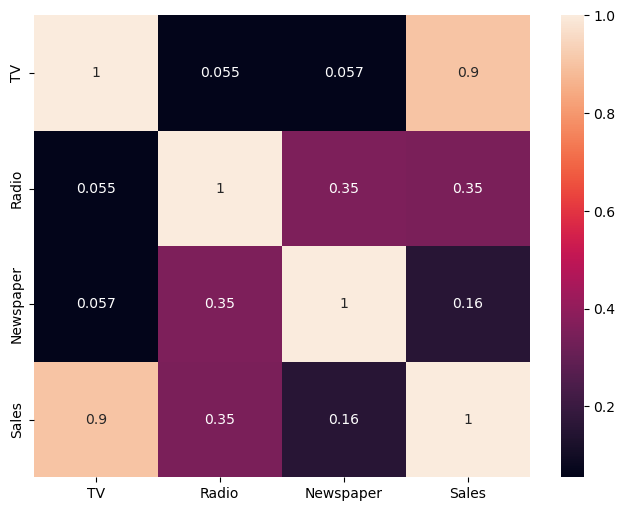

In [11]:
# Plots a pairwise scatter plot matrix of all columns in the dataframe
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True)

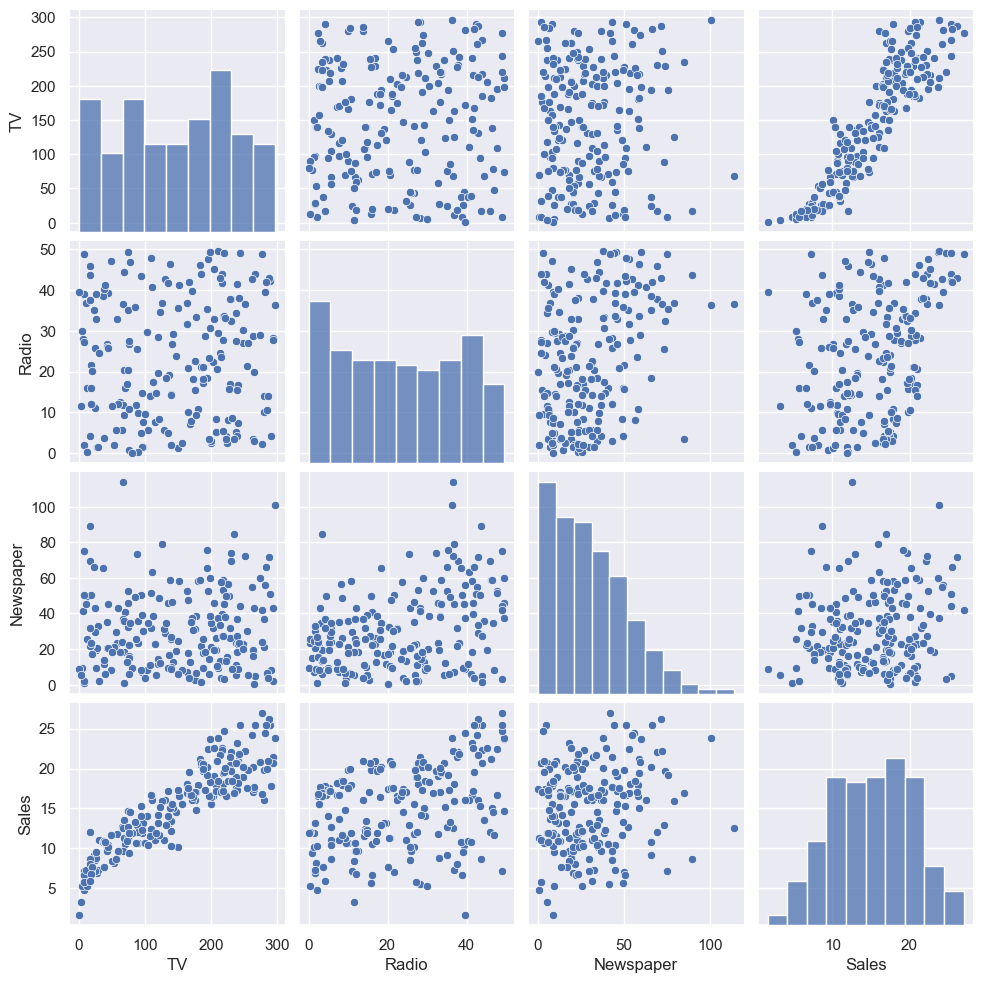

In [12]:
# Sets seaborn color codes and creates a pairwise scatter plot matrix of all columns in the dataframe
sns.set(color_codes=True)
sns.pairplot(df);

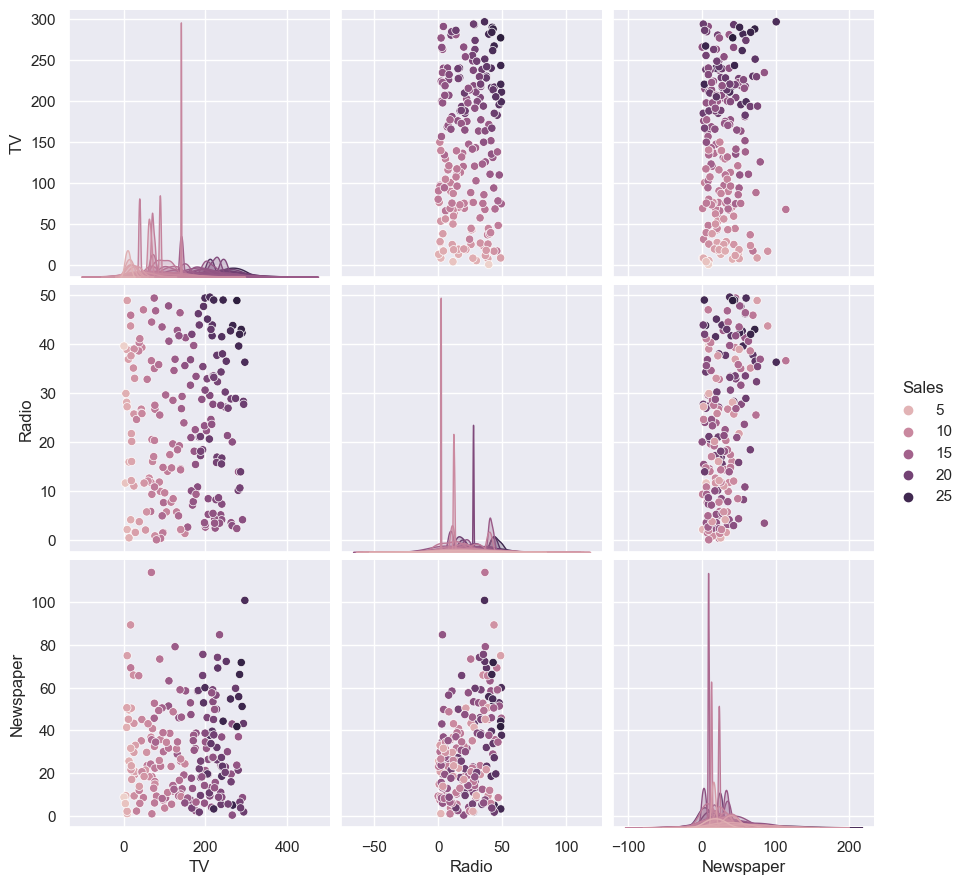

In [13]:
# Creates a pairwise scatter plot matrix of all columns in the dataframe, with data points colored by the 'Sales' column
sns.pairplot(df, hue='Sales', height=3, aspect=1);

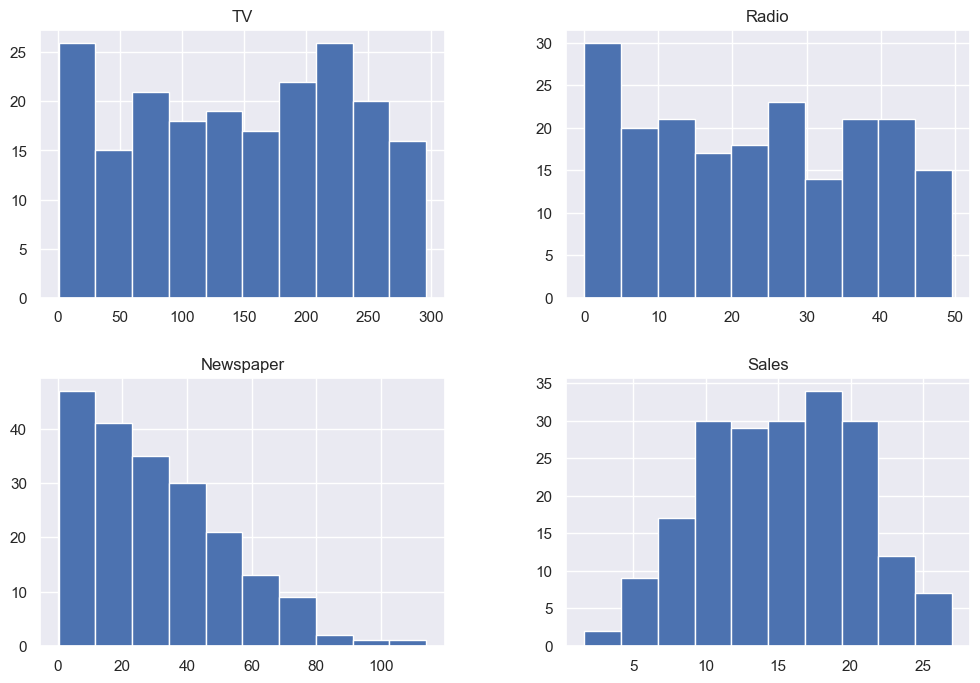

In [14]:
# Creates a histogram of all columns in the dataframe
df.hist(figsize=(12,8));

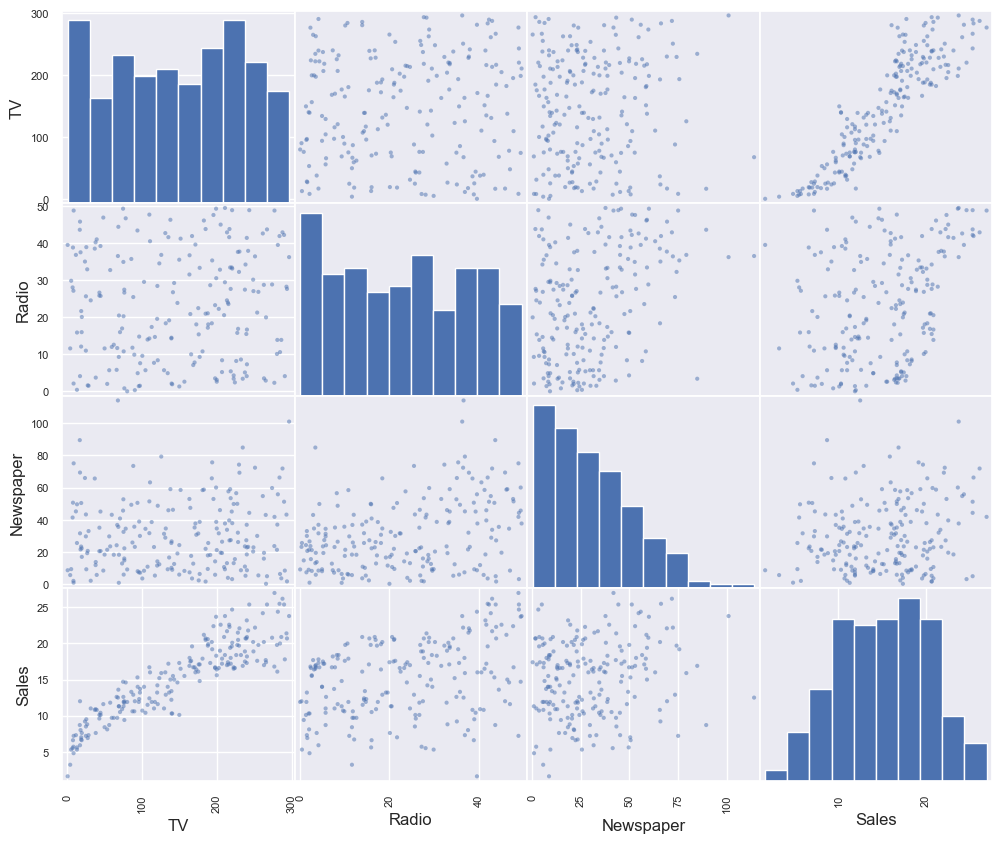

In [15]:
# Creates a scatter matrix of all columns in the dataframe
pd.plotting.scatter_matrix(df, figsize=(12,10));

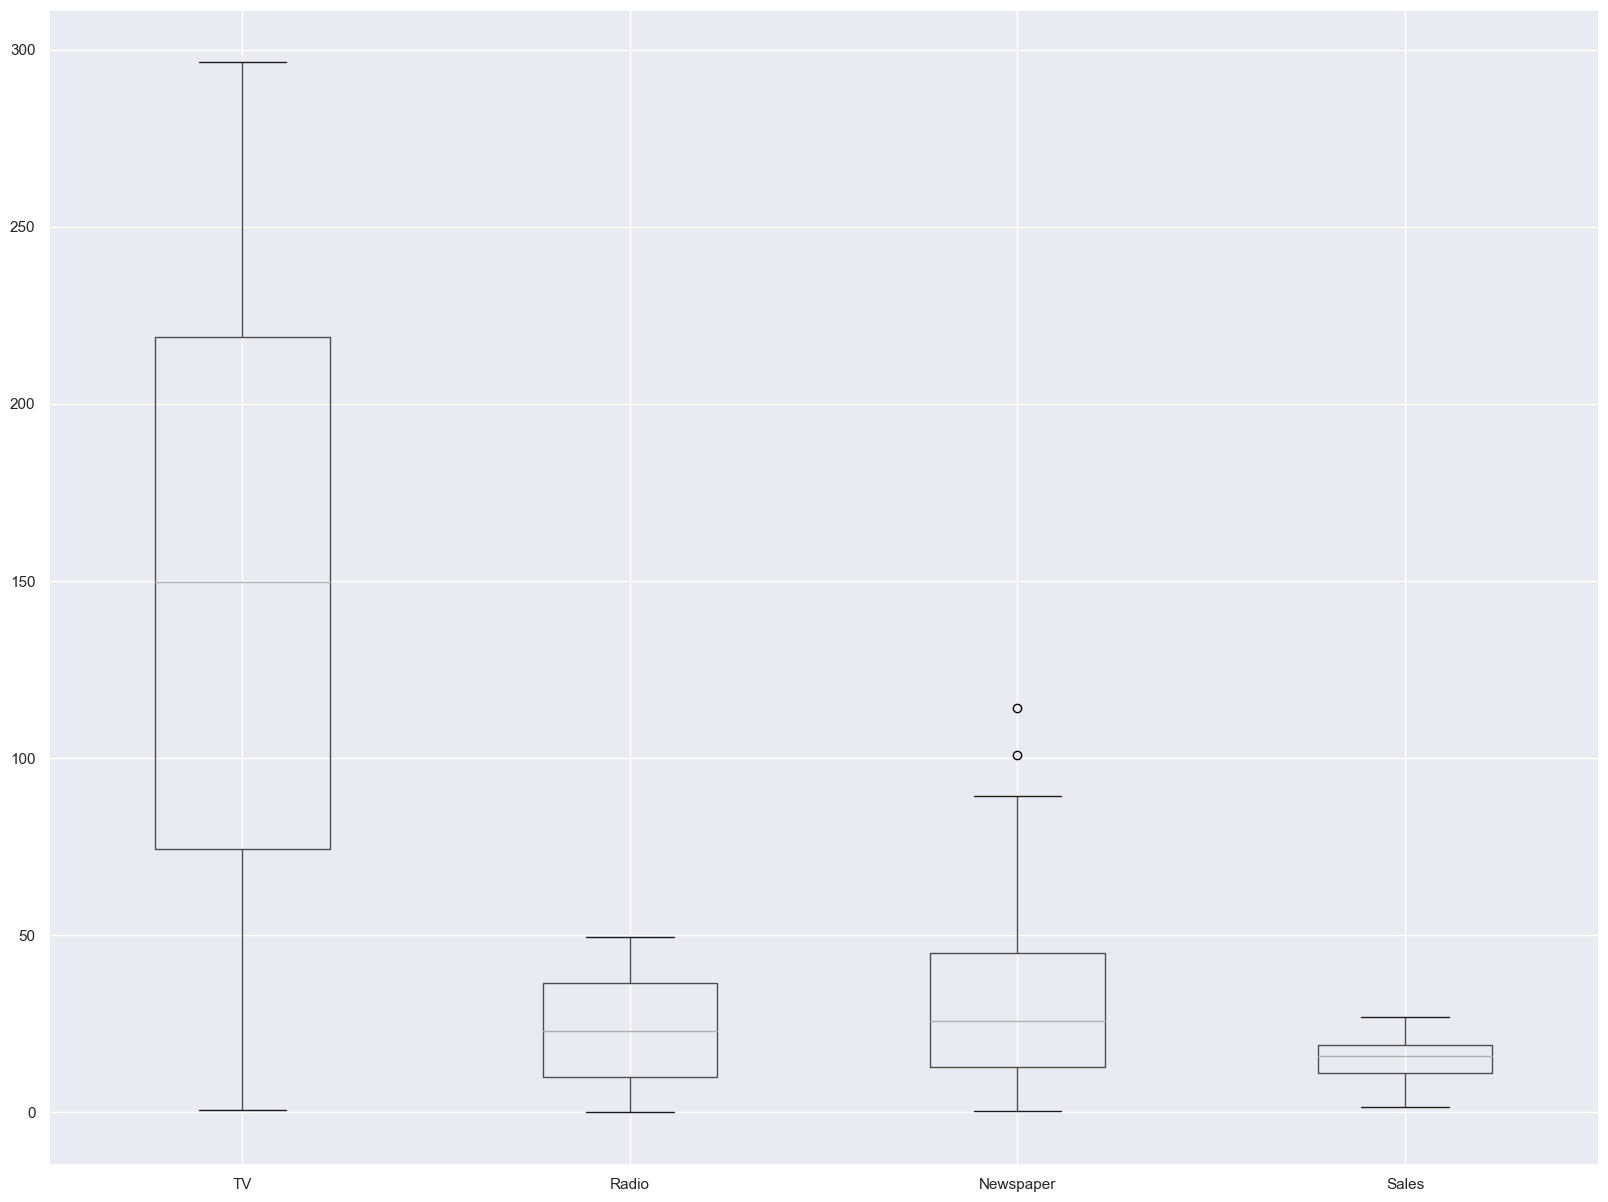

In [16]:
# Creates a box plot of all columns in the dataframe
df.boxplot(figsize=(20,15));

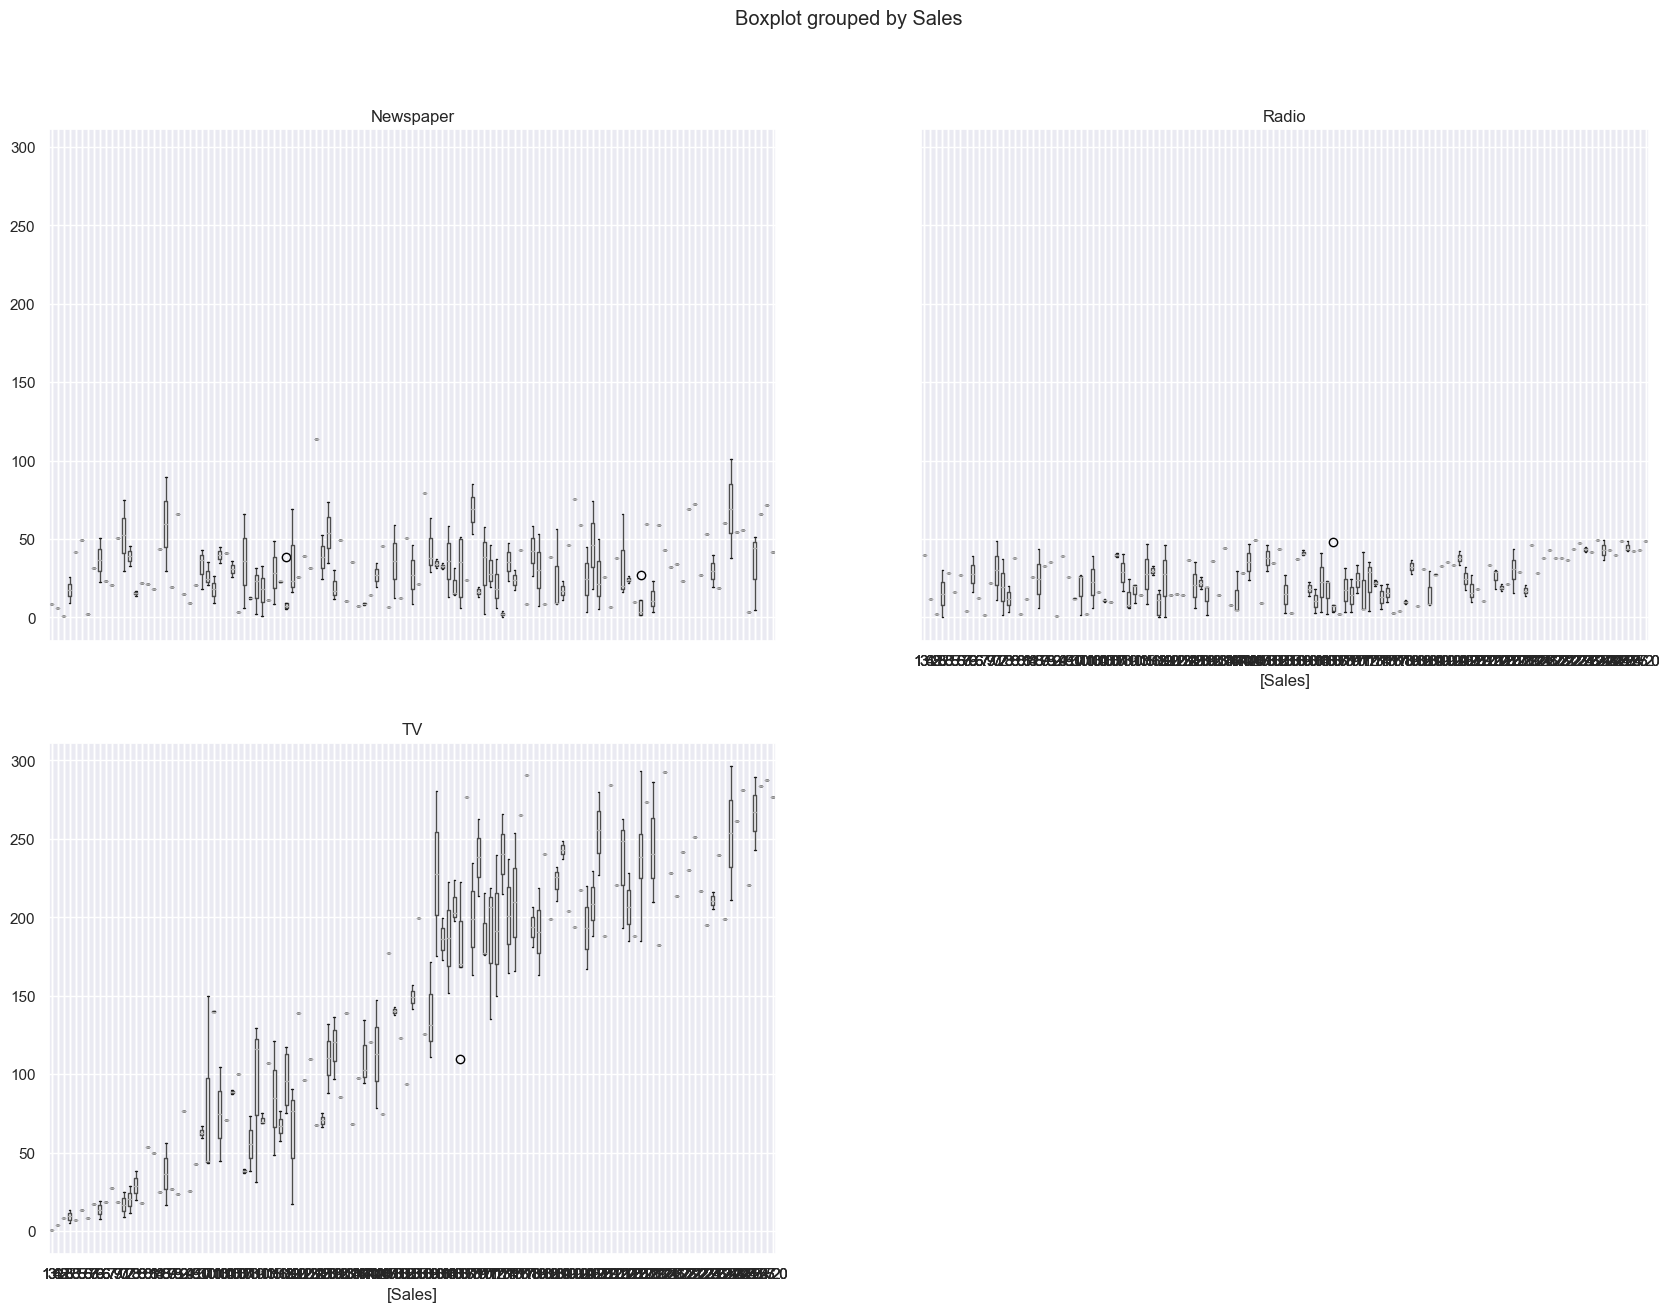

In [17]:
# Creates a box plot of all columns in the dataframe, grouped by the 'by=' column
df.boxplot(by='Sales', figsize=(20,15));

In [18]:
# adeguare codice?
#sns.relplot(x='bill_length_mm', y='body_mass_g', hue='species', col='island', row='sex', data=df)


In [19]:
#variare le classi per adeguare il plot

#plt.figure(figsize=(20,10));
# subplot su matrice 2x2

#plt.subplot(2,2,1)
#sns.violinplot(x='class', y='sepal length', data=df)
#plt.subplot(2,2,2)
#sns.violinplot(x='class', y='sepal width', data=df)
#plt.subplot(2,2,3)
#sns.violinplot(x='class', y='petal length', data=df)
#plt.subplot(2,2,4)
#sns.violinplot(x='class', y='petal width', data=df);

EDA END

In [20]:
# Creates a target variable y containing the 'Target' column and a 
# feature matrix X containing all other columns in the dataframe

y=df['Sales']
X=df.drop(columns='Sales')
X

TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]

In [21]:
# Splits the data into training and testing sets, with 25% of the data in the testing set

X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               train_size=0.25,
                                               random_state=667)


In [22]:
# Creates a Linear Regression model and fits it to the training data

model=LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [23]:
# Prints the coefficients of the Linear Regression model
model.coef_

array([0.06017689, 0.09235313, 0.002319  ])

In [24]:
# Prints the intercept of the Linear Regression model
model.intercept_


4.084699357254927

In [25]:
# Predicts the target variable for the testing set and training set

y_pred=model.predict(X_test)
y_pred_train=model.predict(X_train)

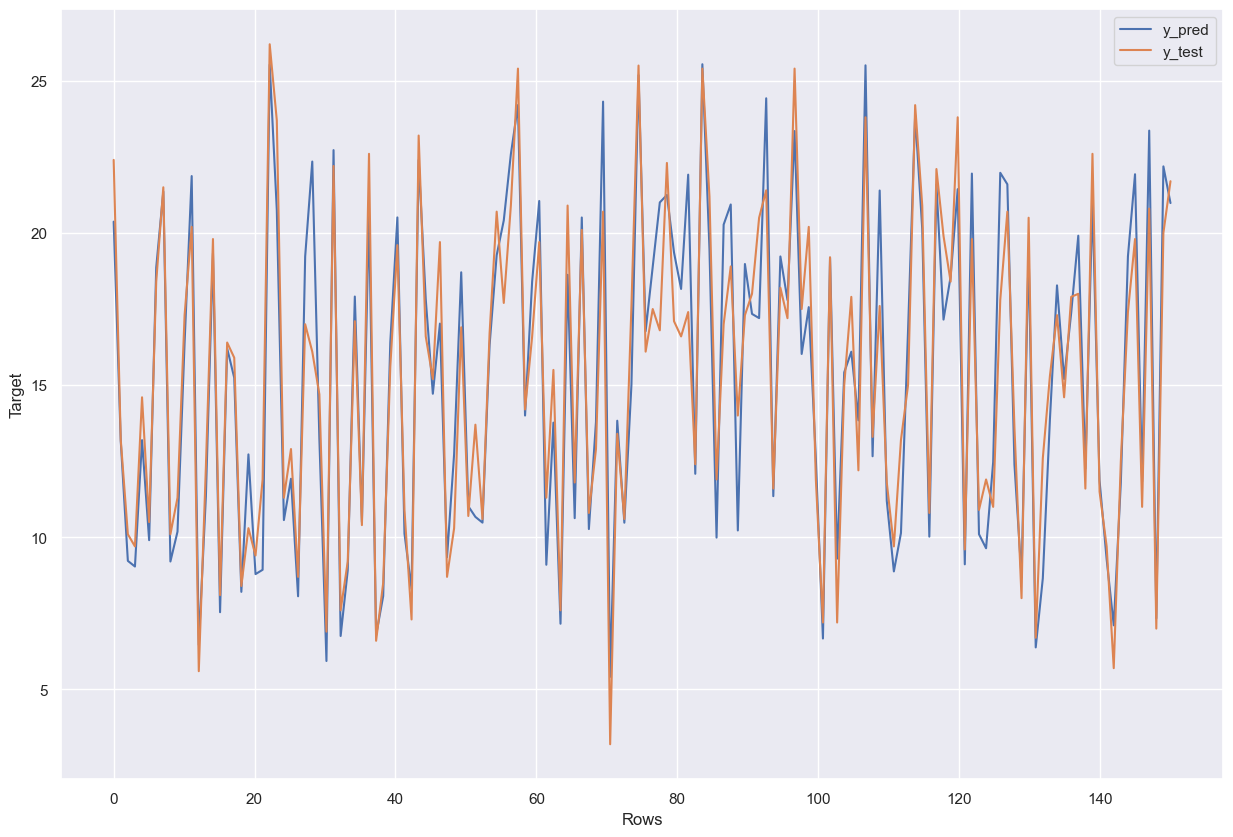

In [26]:
# Plots the predicted target variable values against the true target variable values for the testing set

plt.figure(figsize = (15, 10))
x = np.linspace(0,y_pred.shape[0], y_pred.shape[0])
plt.plot(x,y_pred)
plt.plot(x, y_test)
plt.title('')
plt.xlabel('Rows')
plt.ylabel('Target')
plt.legend(labels= ['y_pred', 'y_test'])

In [27]:
# Creates a DataFrame with the predicted and true target variable values, and calculates the error between them

res_df = pd.DataFrame(data=list(zip(y_pred, y_test)),columns=['predicted', 'real'])
res_df

predicted  real
0    20.371183  22.4
1    13.154983  13.2
2     9.225549  10.1
3     9.039807   9.7
4    13.192664  14.6
..         ...   ...
145  11.829906  11.0
146  23.362563  20.8
147   7.336966   7.0
148  22.186773  20.0
149  20.982032  21.7

[150 rows x 2 columns]

In [28]:
# Creates a DataFrame with the predicted and true target variable values, and calculates the error between them

res_df['error'] = res_df['real'] - res_df['predicted']
res_df

predicted  real     error
0    20.371183  22.4  2.028817
1    13.154983  13.2  0.045017
2     9.225549  10.1  0.874451
3     9.039807   9.7  0.660193
4    13.192664  14.6  1.407336
..         ...   ...       ...
145  11.829906  11.0 -0.829906
146  23.362563  20.8 -2.562563
147   7.336966   7.0 -0.336966
148  22.186773  20.0 -2.186773
149  20.982032  21.7  0.717968

[150 rows x 3 columns]

In [29]:
# Creates a DataFrame with the predicted and true target variable values, and calculates the error between them

res_df['error'].mean()

-0.029489881004569767

In [30]:
# Creates a 3D scatter plot of the data, with Sales as the color variable and TV, Radio, and Newspaper as the axes

import plotly.express as px

fig = px.scatter_3d(df, x='TV', y='Radio', z='Newspaper', color='Sales', color_continuous_scale='Reds', title='Regresione multipla')
fig.update_layout(
    scene=dict(
        xaxis_title='TV',
        yaxis_title='Radio',
        zaxis_title='Newspaper'
    )
)

fig.show()


In [31]:
# Calculates regression metrics for the Linear Regression model

r2score=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=mean_squared_error(y_test,y_pred, squared=False)
    
print('R2 score:',r2score)
print('MAE:' ,mae)
print('MSE:',mse)
print('RMSE:',rmse)

R2 score: 0.887388589670236
MAE: 1.3520525860123749
MSE: 3.0000482506080988
RMSE: 1.732064736263659


In [32]:
# Import MLEM package

import mlem


In [33]:
# Saves the Linear Regression model using the MLEM package

mlem.api.save(model,
              'model', 
              sample_data = X_train 
              )

MlemModel(location=Location(path='/Users/user/Desktop/esame/model.mlem', project=None, rev=None, uri='file:///Users/user/Desktop/esame/model.mlem', project_uri=None, fs=<fsspec.implementations.local.LocalFileSystem object at 0x2818bbc70>), params={}, artifacts={'data': LocalArtifact(uri='model', size=563, hash='188b3ddd67f358073e3d57e69928035a')}, requirements=Requirements(__root__=[InstallableRequirement(module='sklearn', version='1.2.1', package_name='scikit-learn', extra_index=None, source_url=None, vcs=None, vcs_commit=None), InstallableRequirement(module='pandas', version='1.5.3', package_name=None, extra_index=None, source_url=None, vcs=None, vcs_commit=None), CustomRequirement(module='numpy', name='numpy', source64zip='eJxsm8eu61xyRl/F6CntZk4GeiDmTIqZnPxgzjnTL29dw3Z7YEACNDkU995VX61F6PzH38ZjmB/wr/nZi23/8y7Wv89P87d//5e/FcojeJmwXO9HP8tttXksz63hc0lRxunaFKW505qafCUcf/uayp4nhuRk0IbRVX0BZ9xxshsRVSdb2eVxLlRd4fLEqH352WK3XlIaXXs+tETpT1mWhKdMump80uiBnoDeGIYW6YSbIuyuhUjKA35EjRZWRlnPshsPFa2t

In [34]:
# Loads the saved Linear Regression model using the MLEM package and makes a prediction

new_model = mlem.api.load('model.mlem')
new_model.predict(X_test)

array([20.37118281, 13.15498304,  9.22554883,  9.03980666, 13.19266412,
        9.90545306, 18.8661672 , 21.36095086,  9.20508849, 10.18461692,
       16.3948649 , 21.86877854,  6.46247163, 11.33075151, 19.33178594,
        7.53849577, 16.20799753, 15.24042973,  8.20750972, 12.72385865,
        8.79041732,  8.93222056, 25.52926129, 20.75526717, 10.56615516,
       11.92353823,  8.06192769, 19.22871312, 22.34586332, 13.24813599,
        5.93533215, 22.72163367,  6.75716529,  8.91132652, 17.91034846,
       10.49663597, 20.63153997,  6.78149485,  8.06902756, 16.39732249,
       20.50999618, 10.12084841,  8.30141844, 22.39669117, 17.82214612,
       14.71664819, 17.02192053,  9.34483951, 12.73500223, 18.70683161,
       11.02139733, 10.67052651, 10.48195308, 16.3125704 , 19.26965062,
       20.41115115, 22.58757801, 24.20257279, 14.00100839, 18.40327441,
       21.05037123,  9.09787582, 13.7677658 ,  7.15988735, 18.62506281,
       10.62854967, 20.50771723, 10.27085033, 13.78953057, 24.31